In [49]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter
from numpy.random import default_rng

p = 50
f = 10
sf = 5
r = 5

title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)

# Generate Demand points
dx_points = default_rng().choice(p, size=(p - f), replace=False)
dy_points = default_rng().choice(p, size=(p - f), replace=False)

# Generate candidate sites
csx_points = default_rng().choice(p, size=(f), replace=False)
csy_points = default_rng().choice(p, size=(f), replace=False)

# Data to analize
demand_points = []
candidate_sites = []

for x in range(p - f):
    demand_points.append([dx_points[x], dy_points[x]])

for x in range(f):
    candidate_sites.append([csx_points[x], csy_points[x]])


# Divide data
non_selected_sites = list(candidate_sites)
non_covered_points = list(demand_points)


In [50]:
def showInitialPlot(d_points, cs_points):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    plt.savefig("firstg.jpg")
    plt.show()


def addCirclesToPlot(d_points, cs_points, selected_points, of):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    for point in selected_points:
        circle = plt.Circle((point[0], point[1]), r, color='blue', fill=False)
        ax.add_patch(circle)
    plt.xlabel('Objective Function: ' + str(of))
    plt.savefig("secondg.jpg")
    plt.show()

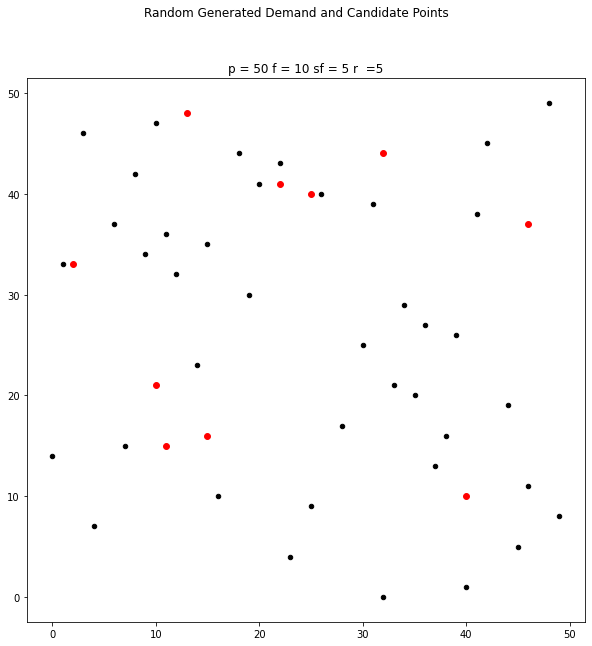

Selected sites: [[25, 40], [40, 10], [22, 41], [11, 15], [10, 21]]
Non selected sites [[32, 44], [15, 16], [46, 37], [2, 33], [13, 48]]
Covered points: [[26, 40], [22, 43], [37, 13], [20, 41], [7, 15], [14, 23]]
Non covered points: [[49, 8], [34, 29], [1, 33], [4, 7], [28, 17], [11, 36], [19, 30], [31, 39], [9, 34], [0, 14], [8, 42], [40, 1], [30, 25], [44, 19], [41, 38], [3, 46], [12, 32], [38, 16], [39, 26], [42, 45], [23, 4], [45, 5], [18, 44], [6, 37], [16, 10], [35, 20], [32, 0], [46, 11], [36, 27], [33, 21], [48, 49], [25, 9], [15, 35], [10, 47]]
Objective function: 6
Number of points covered by every site: [[[25, 40], 2], [[40, 10], 1], [[22, 41], 1], [[11, 15], 1], [[10, 21], 1]]


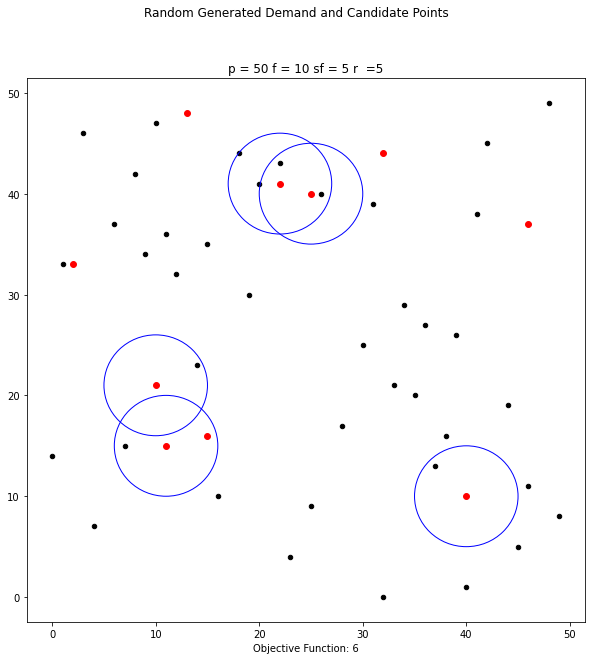

In [51]:
of = 0
selected_sites = []
covered_points = []
individual_covered = []
completed = True

while len(selected_sites)<sf:
    for site in non_selected_sites:
        if len(selected_sites)>=sf:
            completed = False
        count = 0
        for point in non_covered_points:
            d = sqrt((point[0] - site[0]) ** 2 + (site[1] - point[1]) ** 2)
            if d <= r and completed:
                    covered_points.append(point)
                    non_covered_points.remove(point)
                    count += 1
        if count > 0 and completed:
                selected_sites.append(site)
                non_selected_sites.remove(site)
                individual_covered.append([site, count])
                of += count
                break
        

showInitialPlot(demand_points, candidate_sites)
print("Selected sites:", selected_sites)
print("Non selected sites", non_selected_sites)
print("Covered points:", covered_points)
print("Non covered points:", non_covered_points)
print("Objective function:", of)
print("Number of points covered by every site:", individual_covered)
addCirclesToPlot(demand_points, candidate_sites, selected_sites, of)
            